[658, 583, 662, 642, 706, 735, 538, 669, 370, 294, 917, 774, 204, 990, 511]
0.06285450201354048
0.5561808586610929
0.4351392163812341
0.39140854046183315
0.6394746638773052
0.47506153587224975
0.07254358517243475
0.9276145558368019
0.5787978428072571
0.26084494764450317
0.9030390751663756
0.8684678366373253
0.19084602836183417
0.009857019415314028
0.8665454711674065
[204, 294, 370, 511, 538, 583, 642, 658, 662, 669, 706, 735, 774, 917, 990] [0.9276145558368019, 0.9030390751663756, 0.8684678366373253, 0.8665454711674065, 0.6394746638773052, 0.5787978428072571, 0.5561808586610929, 0.47506153587224975, 0.4351392163812341, 0.39140854046183315, 0.26084494764450317, 0.19084602836183417, 0.07254358517243475, 0.06285450201354048, 0.009857019415314028]


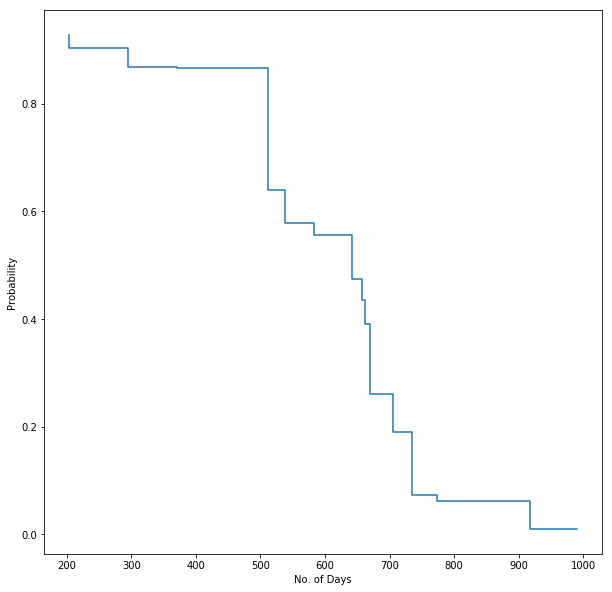

In [129]:
import matplotlib.pyplot as plt
import random
from PIL import Image

x = random.sample(range(100, 1000), 15)
y = []
print(x)
for a in range(len(x)):
    a = random.random()
    print(a)
    y.append(a)
x = sorted(x)    
y = sorted(y, reverse=True)
true_data = zip(x,y)
plt.figure(figsize=(10,10))
print(x,y)
plt.step(x, y)
plt.xlabel('No. of Days') 
plt.ylabel('Probability')
plt.savefig('testplot1.png')
plt.show()

In [130]:
from skimage.exposure import rescale_intensity
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
import imutils
from imutils import contours
import os

img = cv2.imread('testplot1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(type(img))
# Normalize image to between 0 and 255
#image = gray/(gray.max()/255.0)
gray1 = (gray)/(gray.max() - gray.min())
#img *= 255.0/gray.max() 

<class 'numpy.ndarray'>


In [131]:
from sklearn.preprocessing import normalize
# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

filter_h = np.array([[3,0,-3],[10,0,-10],[3,0,-3]])
# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

#Normalize the filter
filter_y = sobelX /np.sum(np.abs(sobelX))
filter_x = sobelY /np.sum(np.abs(sobelY))
filter_h = filter_h / np.sum(np.abs(filter_h))
print(filter_h)
#xmax, xmin = sobelX.max(), sobelX.min()
#sobelX = (sobelX )/(xmax)
#sobelX = (sobelX - xmin) / sobelX.ptp(0)
#sobelX= normalize(sobelX, axis=1, norm='max')
#print("After normalization:")
#print(sobelX)

[[ 0.09375  0.      -0.09375]
 [ 0.3125   0.      -0.3125 ]
 [ 0.09375  0.      -0.09375]]


In [132]:
Output_x = cv2.filter2D(gray1, -1, filter_x)
Output_y = cv2.filter2D(gray1, -1, filter_y)

(Text(0.5, 1.0, 'with y filter'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

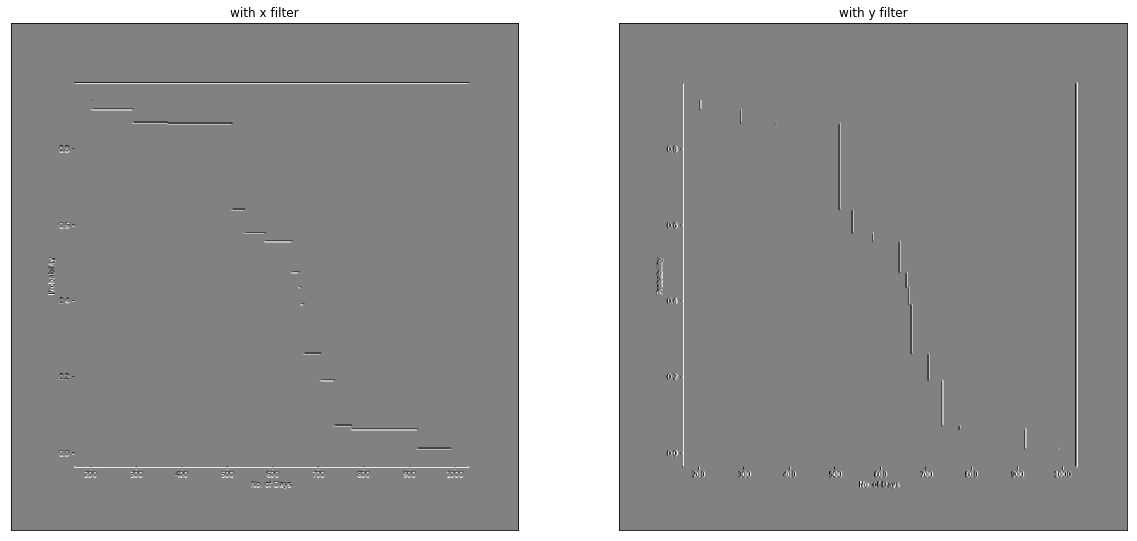

In [133]:
plt.figure(figsize=(20,20))
#plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(Output_x,cmap = 'gray')
plt.title('with x filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(Output_y,cmap = 'gray')
plt.title('with y filter'), plt.xticks([]), plt.yticks([])

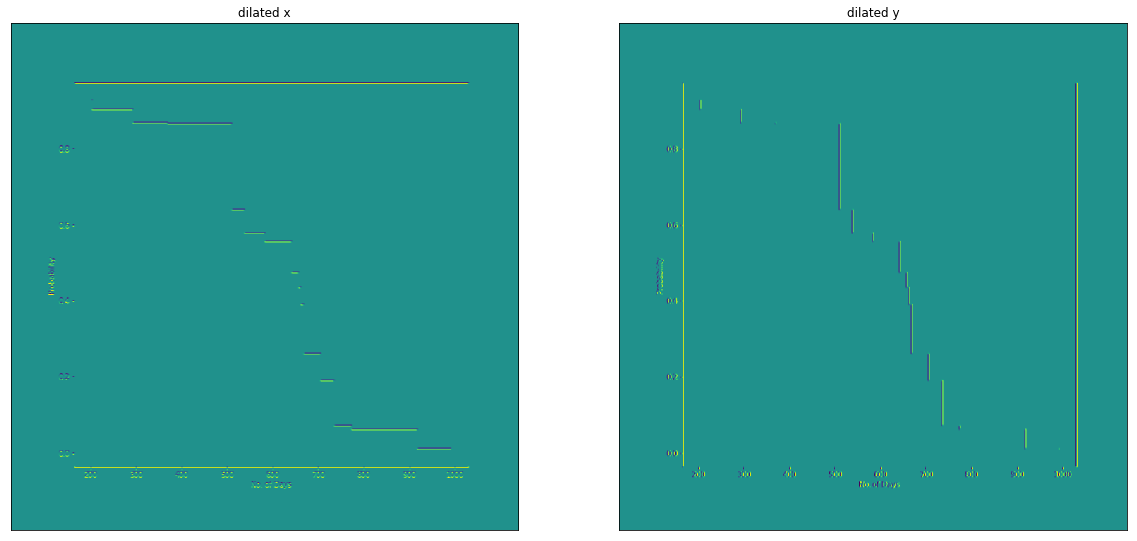

In [134]:
kernel = np.ones((1,1), np.uint8)
img_dilation_x = cv2.dilate(Output_x, kernel, iterations=1)
img_dilation_y = cv2.dilate(Output_y, kernel, iterations=1)

plt.figure(figsize=(20,20))
#plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img_dilation_x)
plt.title('dilated x'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_dilation_y)
plt.title('dilated y'), plt.xticks([]), plt.yticks([])
plt.show()

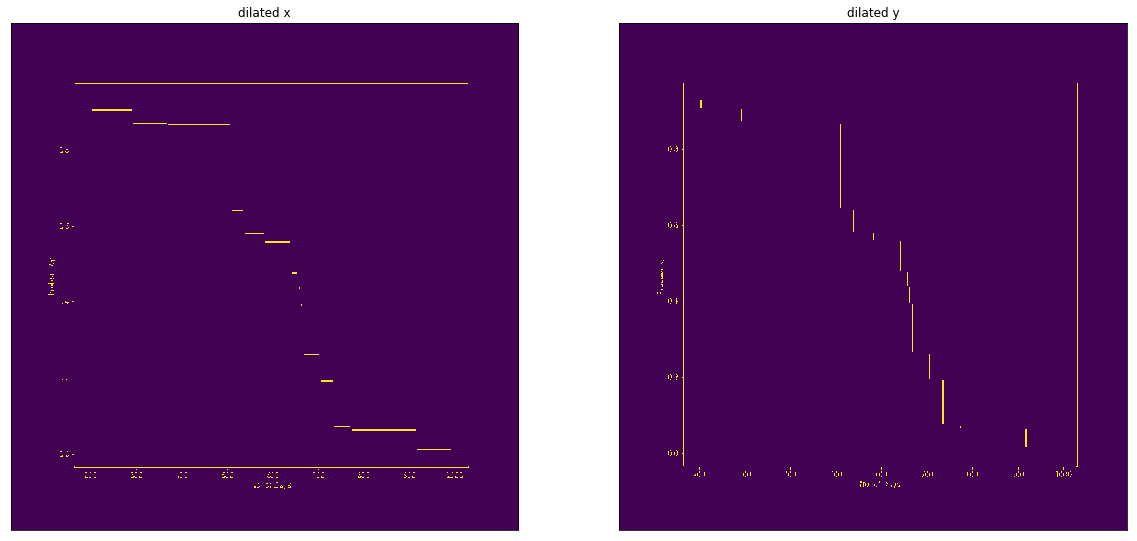

In [135]:
#ret,thresh1 = cv2.threshold(img_dilation,127,255,cv2.THRESH_BINARY)
ret_x, thresh_x = cv2.threshold(img_dilation_x*255, 50,255, cv2.THRESH_BINARY)
thresh_x = np.uint8(thresh_x)

ret_y, thresh_y = cv2.threshold(img_dilation_y*255, 50,255, cv2.THRESH_BINARY)
thresh_y = np.uint8(thresh_y)

plt.figure(figsize=(20,20))
#plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(thresh_x)
plt.title('dilated x'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(thresh_y)
plt.title('dilated y'), plt.xticks([]), plt.yticks([])
plt.show()

h 720
w 720
[(91, 629), (91, 87)]
[(649, 630), (649, 86)]
[(90, 631), (648, 631)]
[(91, 87), (647, 87)]


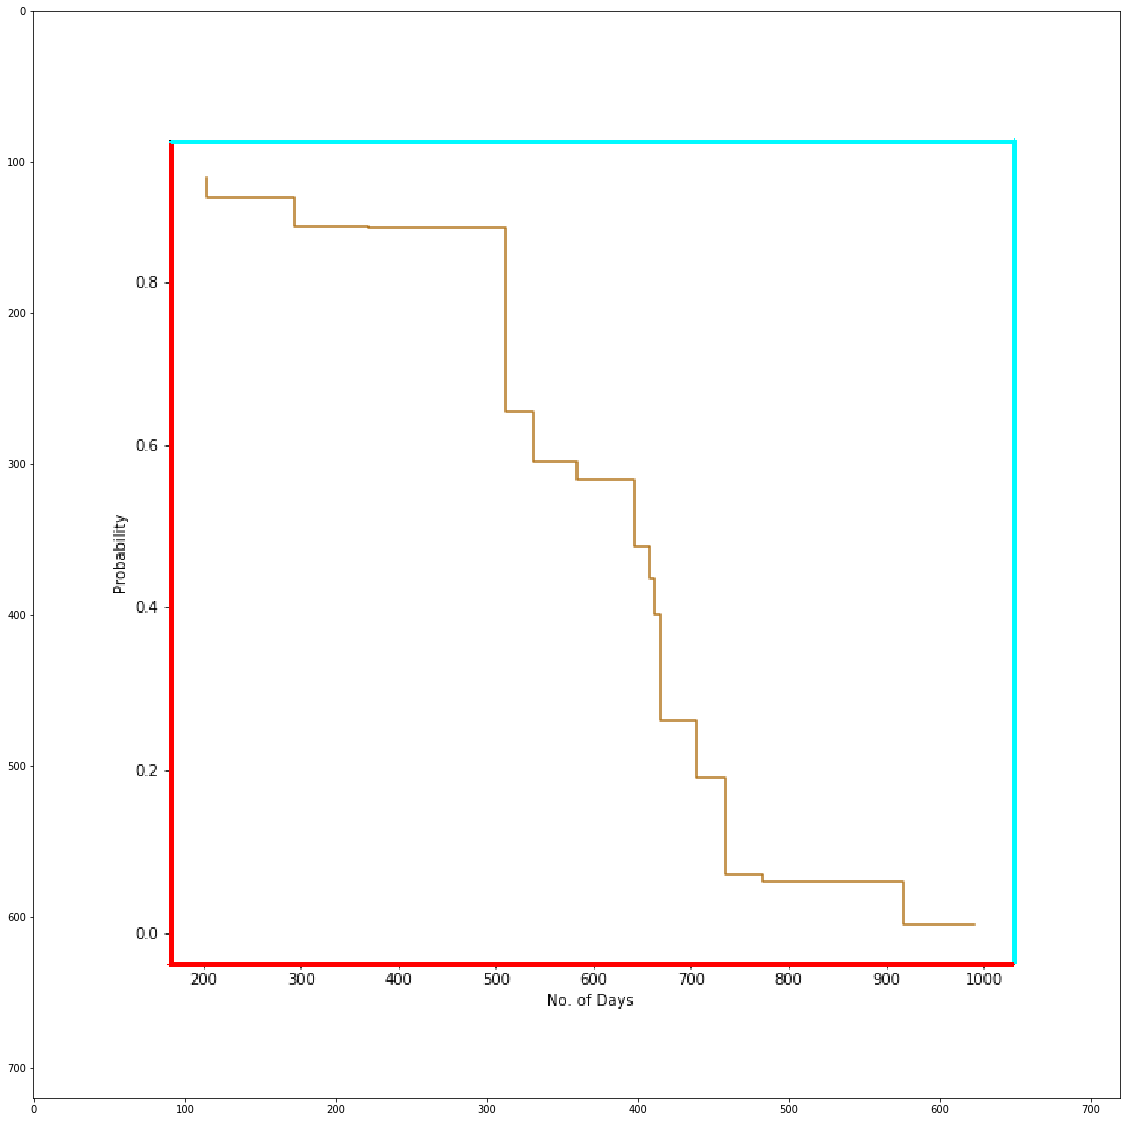

In [136]:
import math
lines_v = cv2.HoughLinesP(thresh_y,1,np.pi/180,80,1,1)
img2 = cv2.imread('testplot1.png')
height, width = img2.shape[:2]
print('h',height)
print('w',width)
X1v = []
Y1v = []
X2v = []
Y2v = []
#print(lines_v)
V_axis1 = []
V_axis2 = []
for line in lines_v:
    for x1,y1,x2,y2 in line:
        if abs(y1 - y2) > height/2:
            X1v.append(x1)
            Y1v.append(y1)
            X2v.append(x2)
            Y2v.append(y2)
            cv2.line(img2,(x1,y1),(x2,y2),(1,250,255),2) 
            #print(x1,y2, x2, y2)
            if x1 < width/2:
                V_axis1 = [(x1,y1),(x2,y2)]
                cv2.line(img2,(x1,y1),(x2,y2),(255, 0, 0),2) 
            else:
                V_axis2 = [(x1,y1),(x2,y2)]
            #cv2.line(img2,(x1,y1),(x2,y2),(255, 0, 0),2) 
            
print(V_axis1)            
print(V_axis2)            

lines_h = cv2.HoughLinesP(thresh_x,1,np.pi/180,80,1,1)
X1h = []
Y1h = []
X2h = []
Y2h = []

H_axis1 = []
H_axis2 = []
for line in lines_h:
    for x3,y3,x4,y4 in line:
        if abs(x3 -x4)>width/2:
            X1h.append(x3)
            Y1h.append(y3)
            X2h.append(x4)
            Y2h.append(y4)
            cv2.line(img2,(x3,y3),(x4,y4),(1,250,255),2) 
            if y3 > height/2:
                H_axis1 = [(x3,y3),(x4,y4)]
                cv2.line(img2,(x3,y3),(x4,y4),(255, 0, 0),2)
            else:
                H_axis2 = [(x3,y3),(x4,y4)]
            #cv2.line(img2,(x1,y1),(x2,y2),(255, 0, 0),2) 
            
print(H_axis1)            
print(H_axis2)            

plt.figure(figsize=(20,20))
plt.imshow(img2,cmap='gray')#

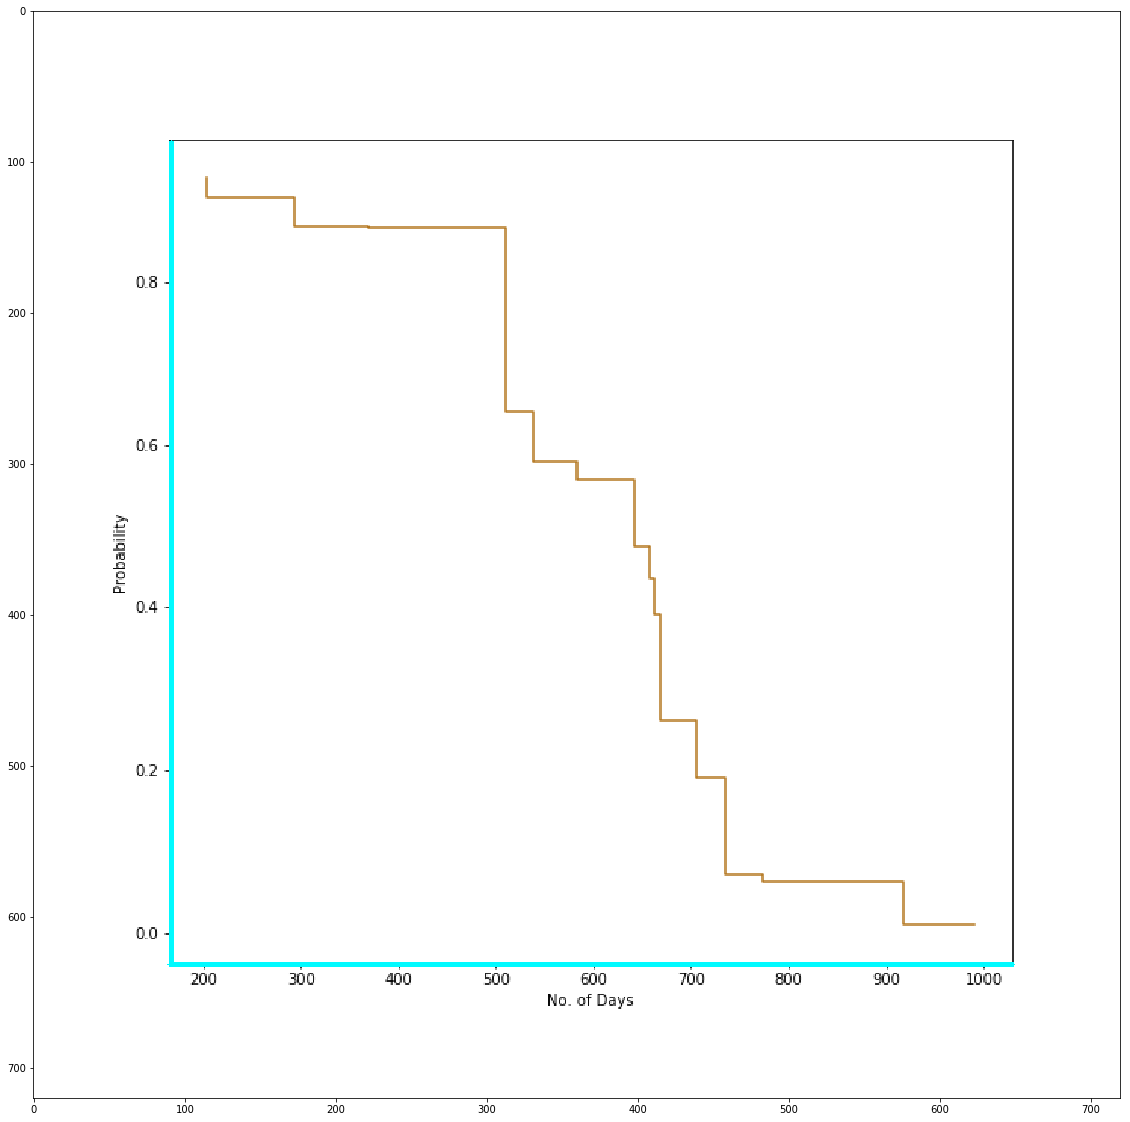

In [137]:
img = cv2.imread('testplot1.png')
plt.figure(figsize=(20,20))
#cv2.line(img2,H_axis1,(1,250,255),2) 
cv2.line(img,(H_axis1[0][0],H_axis1[0][1]),(H_axis1[1][0],H_axis1[1][1]),(1,250,255),2)  
cv2.line(img,(V_axis1[0][0],V_axis1[0][1]),(V_axis1[1][0],V_axis1[1][1]),(1,250,255),2)  

plt.imshow(img)#


In [138]:
# coordinates of vertical axis
xv1 = V_axis1[0][0]
xv2 = V_axis1[1][0]
yv1 = V_axis1[0][1]
yv2 = V_axis1[1][1]
xv3 = V_axis2[0][0]
xv4 = V_axis2[1][0]
yv3 = V_axis2[0][1]
yv4 = V_axis2[1][1]

# coordinates of horizonatal axis
xh1 = H_axis1[0][0]
xh2 = H_axis1[1][0]
yh1 = H_axis1[0][1]
yh2 = H_axis1[1][1]
xh3 = H_axis2[0][0]
xh4 = H_axis2[1][0]
yh3 = H_axis2[0][1]
yh4 = H_axis2[1][1]

print(H_axis1) 
print(V_axis1)
print(H_axis2) 
print(V_axis2)
print(H_axis1[0][0],H_axis1[0][1])
print(H_axis1[1][0],H_axis1[1][1])
print(xv1,yv1,xv2,yv2)
print(xh1,yh1,xh2,yh2)


[(90, 631), (648, 631)]
[(91, 629), (91, 87)]
[(91, 87), (647, 87)]
[(649, 630), (649, 86)]
90 631
648 631
91 629 91 87
90 631 648 631


In [139]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

insxll, insyll =  line_intersection(H_axis1, V_axis1)
insxlu, insylu =  line_intersection(V_axis1, H_axis2)
insxrl, insyrl =  line_intersection(V_axis2, H_axis1)
insxru, insyru =  line_intersection(H_axis2, V_axis2)
print(line_intersection(H_axis1, V_axis1))
print(line_intersection(V_axis1, H_axis2))
print(line_intersection(H_axis2, V_axis2))
print(line_intersection(V_axis2, H_axis1))

(91.0, 631.0)
(91.0, 87.0)
(649.0, 87.0)
(649.0, 631.0)


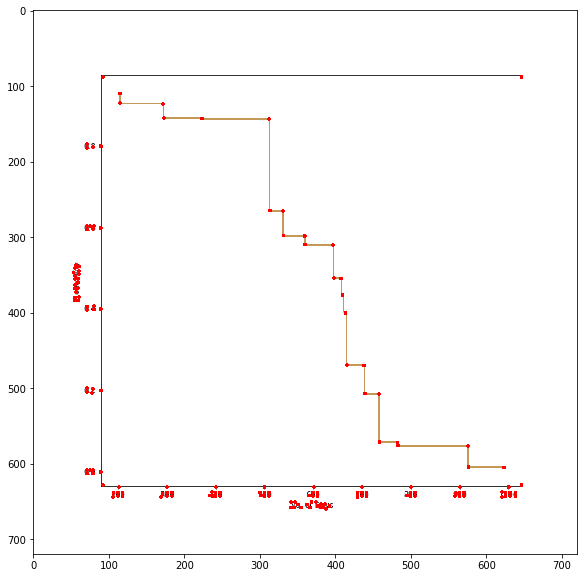

In [140]:
img = cv2.imread('testplot1.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,300,0.02,4)
corners = np.int0(corners)

X_c = []
Y_c = []
for i in corners:
    x,y = i.ravel()
    X_c.append(x)
    Y_c.append(y)
    cv2.circle(img,(x,y),1,350,2)        

#print(X_c,Y_c)   
plt.figure(figsize=(10,10))
  
plt.imshow(img)
plt.show()


[(91, 629), (91, 87)]
[(90, 631), (648, 631)]
629 87
[629, 565, 500, 435, 371, 306, 242, 177, 113] [631, 631, 631, 631, 631, 631, 631, 631, 631]
[89, 89, 89, 89, 89] [611, 503, 395, 288, 180]


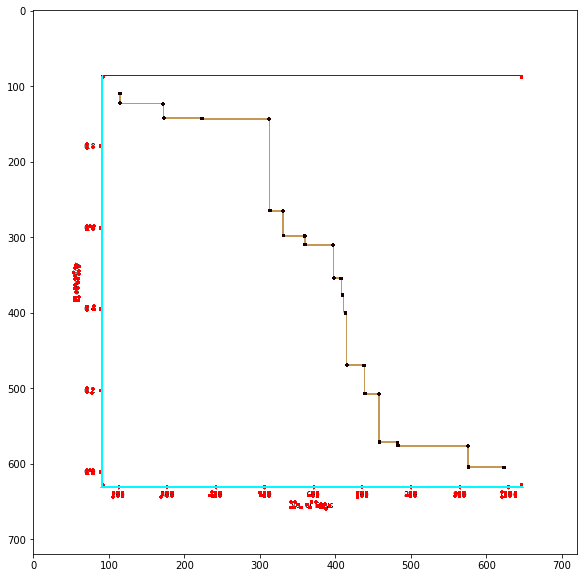

In [141]:
A = []
B = []
X_x = []
X_y = []
Y_x = []
Y_y = []
print(V_axis1)
print(H_axis1)
print(yv1, yv2)
for x, y in zip(X_c,Y_c):
    #print(y)
    if abs(y - yh1)<4 and abs(x - insxll)>5 and abs(x- insxrl)>5 :
        X_x.append(x)
        X_y.append(y)
    if abs(x - xv1)<4 and abs(y-insyll)>5 and abs(y-insylu)>5:
        Y_x.append(x)
        Y_y.append(y)
    if x > xh1+5 and x < xh2-5 and y < yv1-5 and y > yv2+5:
    #if x > 50+5 and y < 253 and x < 390-5 and y > 34:
        cv2.circle(img,(x,y),1,25,2)
        A.append(x)
        B.append(y)
        
print(X_x,X_y)
print(Y_x,Y_y)        
# print('A',A) 
# print('B',B)
plt.figure(figsize=(10,10))
cv2.line(img,(H_axis1[0][0],H_axis1[0][1]),(H_axis1[1][0],H_axis1[1][1]),(1,250,255),2)  
cv2.line(img,(V_axis1[0][0],V_axis1[0][1]),(V_axis1[1][0],V_axis1[1][1]),(1,250,255),2)
plt.imshow(img)
plt.show()


[115, 115, 172, 173, 223, 312, 313, 330, 331, 359, 360, 397, 398, 407, 409, 413, 415, 438, 439, 457, 458, 482, 483, 575, 576, 623] [110, 123, 124, 142, 143, 144, 265, 266, 298, 299, 310, 311, 354, 355, 377, 401, 469, 470, 507, 508, 571, 572, 576, 577, 604, 605]
[115, 115, 173, 173, 223, 313, 313, 331, 331, 360, 360, 398, 398, 409, 413, 415, 415, 439, 439, 458, 458, 483, 483, 576, 576, 623] [123, 123, 142, 142, 143, 265, 265, 298, 298, 310, 310, 354, 354, 377, 401, 469, 469, 507, 507, 571, 571, 576, 576, 604, 604, 605]


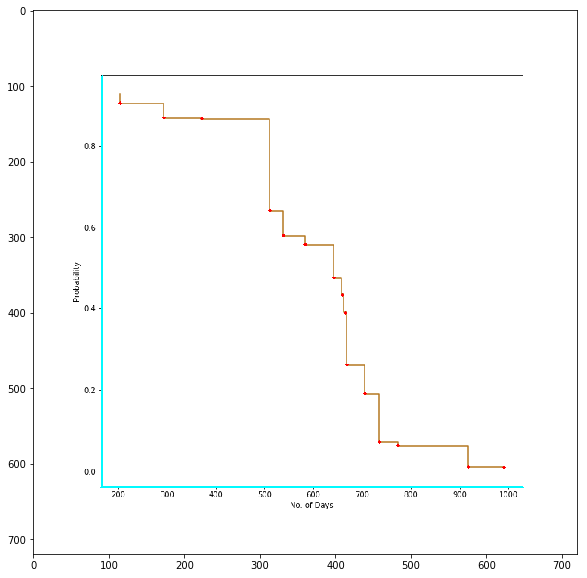

In [142]:
#Approximation
img = cv2.imread('testplot1.png')
ax, ay = sorted(A), sorted(B)
print(ax,ay)
for i in range(len(A)-1):
    if abs(ax[i] - ax[i+1]) < 5:
        ax[i] = ax[i+1]
        ay[i] = ay[i+1]
print(ax,ay)

corners = [(x,y) for x,y in zip(ax,ay)]


for i in corners:
    #x,y = i.ravel()
    x,y = i
    cv2.circle(img,(x,y),2,255,-1)
    #cv2.circle(scatter_img,(x,y),2,255,-1)

plt.figure(figsize=(10,10))
cv2.line(img,(H_axis1[0][0],H_axis1[0][1]),(H_axis1[1][0],H_axis1[1][1]),(1,250,255),2)  
cv2.line(img,(V_axis1[0][0],V_axis1[0][1]),(V_axis1[1][0],V_axis1[1][1]),(1,250,255),2)
plt.imshow(img)
plt.show()

720 720


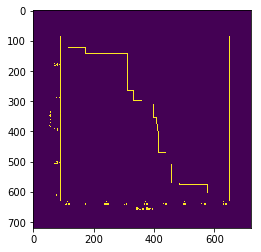

In [143]:
img = cv2.imread("testplot1.png")
height, width = img.shape[:2]
print(height, width)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200)
ref = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)[1]
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
refCnts = imutils.grab_contours(refCnts)
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
digits = {}
plt.imshow(ref)
plt.show()

55
min 53
19
10


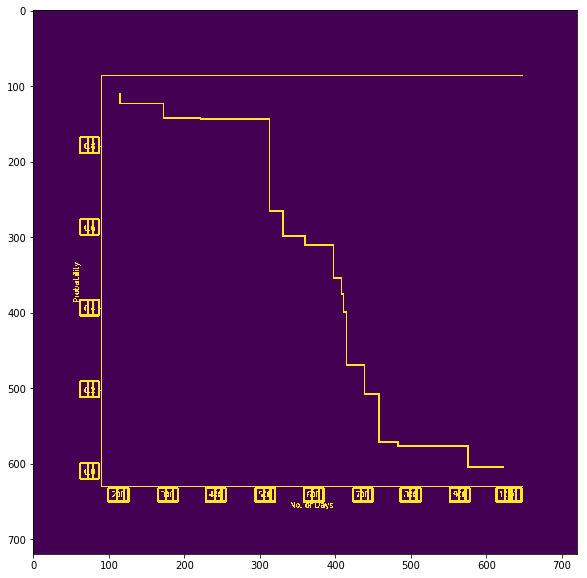

<class 'list'>


In [144]:
counters = []
counters_x = []
counters_y = []
x_min = 999
w_min = 999

print(len(refCnts))

for (i, c) in enumerate(refCnts):
    # compute the bounding box for the digit, extract it    
    (x, y, w, h) = cv2.boundingRect(c)
    #print(w,h)
    if x < x_min:
        x_min = x
    if w < int(width/2) and h < int(height/2) and w>2 and h>2:
        counters.append(c)

print('min',x_min)
        
for (i, c) in enumerate(counters):
    # compute the bounding box for the digit, extract it    
    (x, y, w, h) = cv2.boundingRect(c)    
    if x > (xh1-5) and abs(y-yv1)<2*h:
        counters_x.append(c)
        cv2.rectangle(ref, (x-5,y-5), (x+w+5,y+h+5), (255, 0, 0), 2)
    if x < (xh1+5) and abs(x-xh1)<abs((x_min+w)-xh1):
        counters_y.append(c)
        cv2.rectangle(ref, (x-w,y-h), (x+w+5,y+h+5), (255, 0, 0), 2)
            
        
print(len(counters_x))          
print(len(counters_y))    

plt.figure(figsize=(10,10))    
plt.imshow(ref)
plt.show()
#print(counters)
print(type(counters))

In [145]:
def find_if_close(cnt1,cnt2):
    (x1, y1, w1, h1) = cv2.boundingRect(cnt1) 
    (x2, y2, w2, h2) = cv2.boundingRect(cnt2) 
    row1,row2 = cnt1.shape[0],cnt2.shape[0]
    for i in range(row1):
        for j in range(row2):
            if abs(y1 - y2)< 5:
                dist = abs(x1 - x2)
                if abs(dist) < 20:
                    return True
                elif i==row1-1 and j==row2-1:
                    return False

10


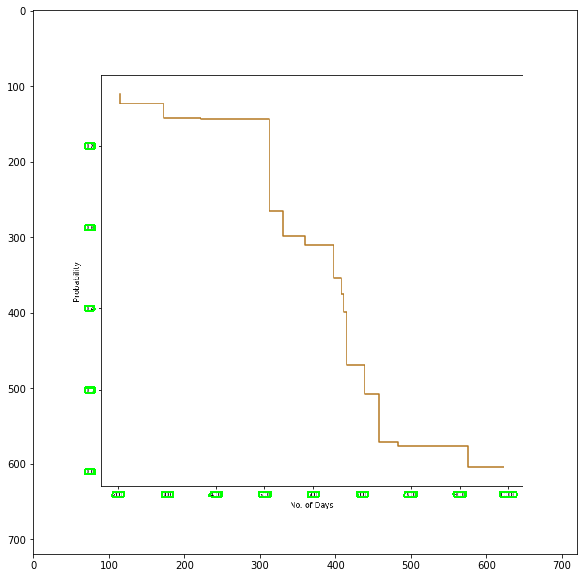

In [146]:
img = cv2.imread("testplot1.png")

LENGTH_x = len(counters_x)
status_x = np.zeros((LENGTH_x,1))

for i,cnt1 in enumerate(counters_x):
    x = i
    if i != LENGTH_x-1:
        for j,cnt2 in enumerate(counters_x[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status_x[i],status_x[x])
                #print('val',val)
                status_x[x] = status_x[i] = val
            else:
                if status_x[x]==status_x[i]:
                    status_x[x] = i+1

unified_x = []
maximum_x = int(status_x.max())+1
for i in range(maximum_x):
    pos = np.where(status_x==i)[0]
    if pos.size != 0:
        cont = np.vstack(counters_x[i] for i in pos)
        hull = cv2.convexHull(cont)
        unified_x.append(hull)

LENGTH_y = len(counters_y)
status_y = np.zeros((LENGTH_y,1))

for i,cnt1 in enumerate(counters_y):
    x = i
    if i != LENGTH_y-1:
        for j,cnt2 in enumerate(counters_y[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status_y[i],status_y[x])
                status_y[x] = status_y[i] = val
            else:
                if status_y[x]==status_y[i]:
                    status_y[x] = i+1

unified_y = []
maximum = int(status_y.max())+1
for i in range(maximum):
    pos = np.where(status_y==i)[0]
    if pos.size != 0:
        cont = np.vstack(counters_y[i] for i in pos)
        hull = cv2.convexHull(cont)
        unified_y.append(hull)
print(len(counters_y))
cv2.drawContours(img,unified_y,-1,(0,255,0),2)                
cv2.drawContours(img,unified_x,-1,(0,255,0),2)
plt.figure(figsize=(10,10))    
plt.imshow(img)
plt.show()

08
06
04
02
0.0


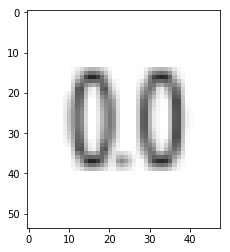

In [156]:
import PIL
from PIL import Image
import pytesseract
img1 = cv2.imread("testplot1.png")
axis_xvalue = []
# for i, cnt_x in enumerate(unified_x):
#     (x1, y1, w1, h1) = cv2.boundingRect(cnt_x) 
#     crop_img_x = img1[y1-2:y1+h1+5, x1-5:x1+w1+5]
#     #crop_img_x = cv2.resize(crop_img_x(50, 58), interpolation = cv2.INTER_AREA)
#     gray1 = cv2.cvtColor(crop_img_x, cv2.COLOR_BGR2GRAY)
#     #gray1 = cv2.threshold(gray1, 100, 255, cv2.THRESH_BINARY_INV)[1]
#     #kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))
#     kernel = np.ones((1,1), np.uint8)
#     #gray1 = cv2.dilate(gray1,kernel,iterations = 100)
#     #gray1 = cv2.erode(gray1, kernel, iterations=100)
#     plt.imshow(gray1)
#     #imagetext_x = pytesseract.image_to_string(gray1,config='--psm 1000')
#     imagetext_x = pytesseract.image_to_string(gray1, config='--psm 10 outputbase digits')
#     axis_xvalue.append(imagetext_x)
#     print(imagetext_x)
# #     if i == 4:
# #         break

img2 = cv2.imread("testplot1.png")
axis_yvalue = []

unified_y1 = contours.sort_contours(unified_y, method="top-to-bottom")[0]
for j, cnt_y in enumerate(unified_y1):
    (x2, y2, w2, h2) = cv2.boundingRect(cnt_y)
    #print(x2,y2,h2,w2)
    crop_img_y = img2[y2-5:y2+h2+5, x2-5:x2+w2+5]
    resize_x = (2, 3)
    crop_img_y = cv2.resize(crop_img_y, (0, 0), fx=resize_x[0], fy=resize_x[1])
    gray2 = (crop_img_y)/(crop_img_y.max() - crop_img_y.min())
    gray2 = cv2.cvtColor(crop_img_y, cv2.COLOR_BGR2GRAY)
    #gray2 = cv2.threshold(gray2, 200, 255, cv2.THRESH_BINARY_INV)[1]
    plt.imshow(crop_img_y)
    imagetext = pytesseract.image_to_string(crop_img_y,config='--psm 10 outputbase digits')
    axis_yvalue.append(imagetext)
    print(imagetext)   
#     if j == 0:
#         break


In [148]:
Xx,Xy = sorted(X_x), sorted(X_y)
Yx,Yy = sorted(Y_x), sorted(Y_y)
print(axis_xvalue)

X_axis = np.concatenate([[Xx],[Xy],[axis_xvalue]],axis=0)
Y_axis = np.concatenate([[Yx],[Yy],[axis_yvalue]],axis=0)
Data = zip(ax,ay)
print(type(X_axis))
print(axis_xvalue[1])

['200', '300', '400', '500', '600', '700', '800', '900', '1000']
<class 'numpy.ndarray'>
300


In [138]:
dx = abs(float(axis_xvalue[1]) - float(axis_xvalue[0]))
px = abs(Xx[3] - Xx[2])
xv_px = dx/px 
print(type(axis_yvalue[1]))
dy = abs(float(axis_yvalue[4]) - float(axis_yvalue[3]))
py = abs(Yy[2] - Yy[1])
yv_px = dy/py 
print(px)
abs(Xx[1] - Xx[0])
print(Xx[0], Xx[1])

<class 'str'>
68
103 171


In [154]:
px = [abs(Xx[i] - Xx[i - 1]) for i in range(1, len(Xx))]
py = [abs(Yy[i] - Yy[i - 1]) for i in range(1, len(Yy))]
dx = [(float(axis_xvalue[i]) - float(axis_xvalue[i - 1])) for i in range(1,len(axis_xvalue))]
dy = [(float(axis_yvalue[i]) - float(axis_yvalue[i - 1])) for i in range(1,len(axis_yvalue))]     
print(dx)
print(dy)
print(px)
print(py)
dx = [i for i in dx]
px = [i for i in px]
xv_px = [i / j for i,j in zip(dx, px)]
print(xv_px)
dy = [i for i in dy]
py = [i for i in py]
yv_px = [i / j for i,j in zip(dy, py)]
print(yv_px)


[2.0, 2.0, 2.0, 2.0]
[-0.20000000000000007, -0.19999999999999996, -0.2, -0.2]
[68, 67, 68, 68]
[47, 48, 48, 47]
[0.029411764705882353, 0.029850746268656716, 0.029411764705882353, 0.029411764705882353]
[-0.004255319148936172, -0.004166666666666666, -0.004166666666666667, -0.00425531914893617]


In [157]:
import statistics 
alpha_x = statistics.mean(xv_px)
alpha_y = statistics.mean(yv_px)
print(alpha_x, alpha_y)
print(float(Xx[0])*alpha_x)
beta_x = float(axis_xvalue[0]) - alpha_x*float(Xx[0])
beta_y = float(axis_yvalue[0]) - alpha_y*float(Yy[0])
print(float(axis_yvalue[0]), float(Yy[0]))
print(beta_x, beta_y)
print(alpha_x * 374 + beta_x)
print(alpha_y * 243 + beta_y)

0.029521510096575942 -0.0042109929078014184
3.040715539947322
0.8 53.0
-1.040715539947322 1.0231826241134752
10.000329236172082
-8.865248226941347e-05


In [163]:
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
cx = Remove(ax)
cy = Remove(ay)
print(cx)
print(cy)

[69, 104, 137, 169, 204, 238, 272, 306, 340, 374]
[95, 97, 110, 112, 142, 163, 176, 213, 241, 242]


In [164]:
Data = zip(cx,cy)
x = []
y = []
print(xh1, yv1)
for a, b in Data:
    #print(a,b)
    i = alpha_x * a + beta_x
    j = alpha_y * b + beta_y
    x.append(i)
    y.append(j)
print(x,y)    

54 251
[0.9962686567164178, 2.029521510096576, 3.003731343283582, 3.9484196663740123, 4.98167251975417, 5.985403863037752, 6.989135206321335, 7.9928665496049165, 8.996597892888499, 10.000329236172082] [0.6231382978723404, 0.6147163120567376, 0.559973404255319, 0.5515514184397163, 0.4252216312056737, 0.33679078014184394, 0.2820478723404255, 0.126241134751773, 0.008333333333333304, 0.004122340425531945]


In [165]:
import pandas as pd
pd.DataFrame(list(zip(cx, cy, x, y)),
              columns=['ax','ay', 'x', 'y'])

,ax,ay,x,y
0,69,95,0.996269,0.623138
1,104,97,2.029522,0.614716
2,137,110,3.003731,0.559973
3,169,112,3.948420,0.551551
4,204,142,4.981673,0.425222
5,238,163,5.985404,0.336791
6,272,176,6.989135,0.282048
7,306,213,7.992867,0.126241
8,340,241,8.996598,0.008333
9,374,242,10.000329,0.004122


In [123]:
import pytesseract
pytesseract.get_tesseract_version()

LooseVersion ('3.04.01')